In [1]:
import os, json
import numpy as np

walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
trial_to_delta = {}
for dirpath, dirnames, filenames in walk:
    if "testingSetScores.json" in filenames:
        data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
        # sort data
        data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
        deltas = []
        for k in data:
            initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
            optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
            delta = optimized_prompt_score - initial_prompt_score
            deltas.append(delta)
            
        print(deltas)
        trial_to_delta[dirpath] = deltas
        avg_change = sum(deltas) / len(deltas)
        print(f"Avg change: {dirpath}: {avg_change}")

print(f"All deltas: {trial_to_delta}")
for k,v in trial_to_delta.items():
    mean = np.mean(v)
    std = np.std(v)
    ci = 1.96 * std / np.sqrt(len(v))
    print(f"{k}, Mean: {np.mean(v)}")
    print(f"{k}, Std: {np.std(v)}")
    print(f"{k}, CI: {ci}")
    

[20.61620034332927, 9.147801537168064, 42.97257941953642, 36.50444878741296, 13.441434926215521, 14.587874401315307, 12.715452224935373, 26.619349955296578, 39.67325775614633, 17.579847368554958, 15.468308100944013, 0.6485253922046041, 14.721557641505372, 14.556871261591144, 25.424053968560713, -0.2630637994524534, 18.44845777629508, 49.066167895961705]
Avg change: ./trial5: 20.662729164306718
[20.743196391918996, 8.952250934764862, 43.063331666678465, 34.375050854302025, 13.364354275735238, 14.709584332800834, 12.739226385574401, 27.00831535382362, 39.734842424687194, 17.28973939752977, 15.478166052078274, 0.5845463812228502, 21.7212157159192, 14.611304467186304, 25.106274669432313, -0.08627072705277783, 15.0684151731191, 49.04719551615558]
Avg change: ./trial4: 20.75059662588201
[20.955976530635024, 8.785869630196899, 49.677919179456914, 34.4163798687596, 13.633584048066396, 14.639368328275005, 12.743272280873658, 26.985100937158805, 39.789205087681864, 18.00063913795511, 15.45169529

In [2]:
seed_to_score = {16: 26.707008152779892, 8:25.000732779331447, 4: 22.0927988330106, 2: 20.75059662588201, 1: 20.662729164306718}
ci = np.array([8.784037789623328, 8.036085227176043, 6.433360383219535, 6.110101192703897, 6.171443183701752])
import numpy as np

# x is the keys of the seed_to_score dict, y is the values
x = list(seed_to_score.keys())
y = list(seed_to_score.values())
print(f"Mean: {np.mean(y)}")
print(f"Confidence interval: {ci}")

Mean: 23.042773111062132
Confidence interval: [8.78403779 8.03608523 6.43336038 6.11010119 6.17144318]


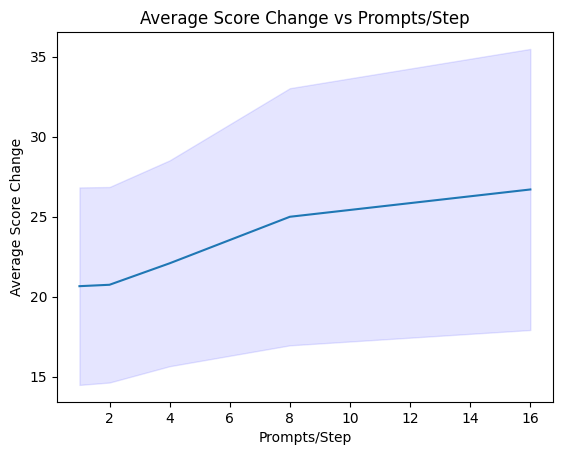

In [3]:
# plot seed_to_score as line graph
import matplotlib.pyplot as plt
plt.plot(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("Prompts/Step")
plt.ylabel("Average Score Change")
plt.title("Average Score Change vs Prompts/Step")
# plt.ylim(bottom=0)  # This line sets the y-axis to start from 0
# plt.savefig("average_score_change_vs_seed.png")
plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.show()

# # bar graph
# plt.bar(seed_to_score.keys(), seed_to_score.values())
# plt.xlabel("Prompts/Step")
# plt.ylabel("Average Score Change")
# plt.title("Average Score Change vs Prompts/Step")
# # plt.savefig("average_score_change_vs_seed_bar.png")
# plt.show()